In [1]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
df = pd.read_csv('/content/users_clustering_dataset.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178591 entries, 0 to 178590
Data columns (total 22 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   AGE                        176609 non-null  float64
 1   CONTACT_GENDER             176609 non-null  object 
 2   DISTRICT_CODE              178591 non-null  object 
 3   PREFERRED_LANGUAGE         178591 non-null  object 
 4   HSPA                       177613 non-null  object 
 5   ENTERTAINMENT_MUSIC_LOVER  178529 non-null  float64
 6   SOCIAL_MEDIA_USER          178529 non-null  float64
 7   ENTERTAINMENT_MOVIE_LOVER  178529 non-null  float64
 8   CYBER_GAMERS               178529 non-null  float64
 9   PARENT                     178529 non-null  float64
 10  PROFESSION                 178529 non-null  float64
 11  RELIGION                   178529 non-null  float64
 12  SPORTS_LOVER               178529 non-null  float64
 13  VIDEO_WATCHER              17

In [4]:

def preprocess_data(df):
    # Drop rows with missing values in the target column
    df = df.dropna(subset=['ARPU'])
    
    # Preprocess categorical columns
    categorical_cols = ['CONTACT_GENDER', 'DISTRICT_CODE', 'PREFERRED_LANGUAGE', 'HSPA']
    for col in categorical_cols:
        df[col] = df[col].astype('category')
    
    # Encode categorical variables with OrdinalEncoder
    ordinal_encoder = OrdinalEncoder()
    df[categorical_cols] = ordinal_encoder.fit_transform(df[categorical_cols])
    
    # Impute missing values in the predictor columns with the mean
    imputer = SimpleImputer()
    predictor_cols = df.columns.drop(['AGE', 'ARPU'])
    df[predictor_cols] = imputer.fit_transform(df[predictor_cols])
    
    # Scale numeric variables with StandardScaler
    numeric_cols = df.columns.drop(categorical_cols)
    scaler = StandardScaler()
    df[numeric_cols] = scaler.fit_transform(df[numeric_cols])
    
    return df



In [5]:
processed_df = preprocess_data(df)

<ipython-input-4-2d659be11063>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].astype('category')
/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)
/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation:

In [6]:
processed_df

,AGE,CONTACT_GENDER,DISTRICT_CODE,PREFERRED_LANGUAGE,HSPA,ENTERTAINMENT_MUSIC_LOVER,SOCIAL_MEDIA_USER,ENTERTAINMENT_MOVIE_LOVER,CYBER_GAMERS,PARENT,...,SPORTS_LOVER,VIDEO_WATCHER,TV_WATCHERS,TIKTOK_USER,EZCASH_USER,STARPOINT_USER,GENIE_USER,PROMOTION_SEEKER,VIU_USER,ARPU
0,3.192795,0.0,13.0,0.0,1.0,-0.157183,-0.672627,-0.090245,-0.256697,-0.035259,...,-0.070954,-0.153560,0.0,-0.504243,-0.094317,-0.117326,0.0,-0.018411,0.0,-0.107582
1,-0.159405,1.0,0.0,2.0,1.0,-0.157183,-0.672627,-0.090245,-0.256697,-0.035259,...,-0.070954,-0.153560,0.0,-0.504243,-0.094317,-0.117326,0.0,-0.018411,0.0,-0.107582
2,-1.606945,0.0,6.0,2.0,2.0,-0.157183,1.138080,-0.090245,-0.256697,-0.035259,...,-0.070954,-0.153560,0.0,-0.504243,-0.094317,-0.117326,0.0,-0.018411,0.0,-0.107582
3,-0.311777,0.0,9.0,1.0,2.0,-0.157183,2.345218,-0.090245,-0.256697,-0.035259,...,-0.070954,-0.153560,0.0,2.654628,-0.094317,-0.117326,0.0,-0.018411,0.0,-0.107582
4,-0.921268,1.0,10.0,2.0,2.0,-0.157183,-0.069058,-0.090245,-0.256697,-0.035259,...,-0.070954,-0.153560,0.0,0.759305,-0.094317,9.416646,0.0,-0.018411,0.0,-0.107582
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178586,-0.921268,1.0,7.0,1.0,1.0,-0.157183,0.534511,-0.090245,-0.256697,-0.035259,...,-0.070954,8.826549,0.0,-0.504243,-0.094317,-0.117326,0.0,-0.018411,0.0,0.133440
178587,-0.845082,0.0,13.0,1.0,2.0,-0.157183,2.345218,-0.090245,-0.256697,-0.035259,...,-0.070954,-0.153560,0.0,2.654628,-0.094317,-0.117326,0.0,-0.018411,0.0,-0.107582
178588,-0.692709,0.0,1.0,0.0,2.0,3.507557,1.138080,-0.090245,-0.256697,-0.035259,...,-0.070954,-0.153560,0.0,-0.504243,-0.094317,-0.117326,0.0,-0.018411,0.0,-0.107582
178589,-0.159405,0.0,22.0,0.0,1.0,-0.157183,-0.672627,-0.090245,-0.256697,-0.035259,...,-0.070954,-0.153560,0.0,-0.504243,-0.094317,-0.117326,0.0,-0.018411,0.0,-0.107582


In [10]:
data = processed_df
inertias = []

In [11]:
for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(data)
    inertias.append(kmeans.inertia_)

/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: F

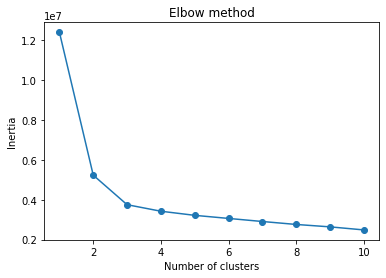

In [12]:
plt.plot(range(1,11), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()